In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

In [0]:
def distance(pos1,pos2):
    y1,x1 = pos1
    y2,x2 = pos2
    return abs(y1 - y2) + abs(x1 - x2)

def G_cost(start,coord):
    return distance(start,coord)

def H_cost(end,coord):
    return distance(end,coord)

def F_cost(start,end,coord):
    return G_cost(start,coord) + H_cost(end,coord)

def neighbors(coord,board):
    y,x = coord
    n = [(y-1,x),(y,x-1),(y,x+1),(y+1,x)]
    neighbors = []
    for c in n:
        y,x = c
        if 0 <= y < len(board):
            if 0 <= x < len(board[y]):
                neighbors.append(c)
    return neighbors

def get_optimal(start,end,open_):
    lowest_f_cost = None
    c = None 
    for coord in open_:
        f_cost = F_cost(start,end,coord)
        if lowest_f_cost == None or f_cost < lowest_f_cost:
            c = coord
            lowest_f_cost = f_cost
    return c

def explore(start,end,board):
    parents = {}
    open_ = []
    closed_ = []
    open_.append(start)

    while True:
        c = get_optimal(start,end,open_)
        open_.remove(c)
        closed_.append(c)
        if c == end:
            path = trace_back(start,end,parents)
            return (path, closed_)
        for coord in neighbors(c,board):
            if board[coord] == -1 or coord in closed_:
                continue
            parents[coord] = c
            if coord not in open_:
                open_.append(coord)

def trace_back(start,end,parents):
    path = []
    path.append(end)
    while True:
        c = path[-1]
        if c == start:
            return path
        parent = parents[c]
        path.append(parent)

In [0]:
board = np.zeros((15,15))

# big obstacle
board[5,5] = -1
board[4,5] = -1
board[3,5] = -1
board[2,5] = -1
board[1,5] = -1
board[0,5] = -1
board[2,6] = -1
board[2,7] = -1

start = (0,0)
end = (2,14)

path, steps = explore(start,end,board)
list_ = steps + path

In [0]:
fig,ax = plt.subplots()
def animate(i):
    if i >= len(list_):
        return
    ax.clear()
    coord = list_[i]
    board[coord] = i
    ax.scatter(x=start[1],y=start[0],c='green')
    ax.scatter(x=end[1],y=end[0],c='red')
    ax.imshow(board)

ani = animation.FuncAnimation(fig,animate,interval=100)
plt.close()

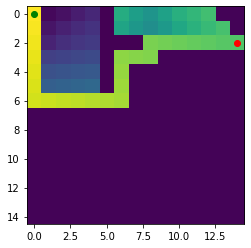

In [6]:
plt.imshow(board)
plt.scatter(x=start[1],y=start[0],c='green')
plt.scatter(x=end[1],y=end[0],c='red')

In [5]:
HTML(ani.to_html5_video())